In [39]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [40]:
df = pd.read_csv('Final.csv')

In [41]:
df = df.drop(['Unnamed: 0'],axis=1)

In [42]:
df = df.drop(['ArrTime','DepTime','time'],axis=1)

In [43]:
df = df.drop(['CRSDepTime','WindGustKmph','tempF','DepDel15'],axis=1)

In [44]:
df = df.drop(['Quarter'],axis=1)

In [45]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindChillF',
       'humidity'],
      dtype='object')

In [46]:
weather_columns = [
    'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM', 
    'visibility', 'pressure', 'cloudcover', 'DewPointF', 
    'WindChillF', 'humidity'
]
scaler = MinMaxScaler()
df[weather_columns] = scaler.fit_transform(df[weather_columns])
df.head()

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,0.0,0.0,1100,0.084746,0.216667,0.031915,0.0,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,0.0,0.0,1800,0.101695,0.436111,0.031915,0.0,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,13.0,0.0,2000,0.050847,0.372222,0.010638,0.0,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,0.0,0.0,1500,0.237288,0.661111,0.010638,0.0,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,0.0,0.0,1900,0.186441,0.455556,0.010638,0.0,0.5,0.564516,0.07,0.639175,0.643836,0.443299


In [47]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,0.0,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,0.0,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,13.0,0.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,0.0,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,0.0,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289
1832248,2016,1,3,14107,11292,42.0,2259,39.0,1.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,67.0,1.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [48]:
df['ArrDel15'].value_counts()

ArrDel15
0.0    1448082
1.0     384170
Name: count, dtype: int64

In [49]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
0,2017,12,1,14107,12892,0.0,1213,0.0,0.0,1100,0.084746,0.216667,0.031915,0.000000,0.5,0.500000,1.00,0.505155,0.643836,0.257732
1,2017,12,1,14107,12892,0.0,1852,0.0,0.0,1800,0.101695,0.436111,0.031915,0.000000,0.5,0.467742,1.00,0.494845,0.684932,0.185567
2,2017,12,1,14107,14771,16.0,2052,13.0,0.0,2000,0.050847,0.372222,0.010638,0.000000,0.5,0.483871,0.35,0.536082,0.684932,0.226804
3,2017,12,1,12892,14747,0.0,1819,0.0,0.0,1500,0.237288,0.661111,0.010638,0.000000,0.5,0.500000,0.50,0.701031,0.554795,0.845361
4,2017,12,1,11298,14771,0.0,2133,0.0,0.0,1900,0.186441,0.455556,0.010638,0.000000,0.5,0.564516,0.07,0.639175,0.643836,0.443299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832247,2016,1,3,13204,13930,0.0,1330,0.0,0.0,1200,0.271186,0.902778,0.670213,0.075410,0.4,0.532258,1.00,0.731959,0.575342,0.876289
1832248,2016,1,3,14107,11292,42.0,2259,39.0,1.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,67.0,1.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [50]:
df.to_csv('merge_for_reg.csv')

In [15]:
df = df[df['ArrDel15']==1]

In [16]:
df

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrDelayMinutes,ArrDel15,Time,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindChillF,humidity
13,2017,12,1,11292,11298,0.0,1302,19.0,1.0,1000,0.254237,0.769444,0.010638,0.000000,0.5,0.548387,0.73,0.391753,0.397260,0.567010
17,2017,12,1,14771,14107,23.0,1908,26.0,1.0,1600,0.220339,0.855556,0.106383,0.000000,0.5,0.548387,0.88,0.690722,0.534247,0.958763
25,2017,12,2,10397,13930,31.0,2019,17.0,1.0,1900,0.067797,0.727778,0.031915,0.000000,0.5,0.596774,0.86,0.711340,0.582192,0.814433
86,2017,12,3,12892,14107,26.0,2029,32.0,1.0,1800,0.169492,0.669444,0.010638,0.000000,0.5,0.483871,0.52,0.721649,0.554795,0.917526
105,2017,12,3,14771,12892,341.0,930,325.0,1.0,800,0.135593,0.886111,0.000000,0.000000,0.5,0.612903,0.02,0.608247,0.493151,0.752577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832246,2016,1,3,13930,12889,21.0,2359,17.0,1.0,2200,0.271186,0.855556,0.000000,0.000000,0.5,0.693548,0.39,0.381443,0.267123,0.896907
1832248,2016,1,3,14107,11292,42.0,2259,39.0,1.0,2100,0.288136,0.211111,0.031915,0.000000,0.5,0.467742,0.99,0.546392,0.595890,0.402062
1832249,2016,1,3,11292,14107,58.0,2024,53.0,1.0,1900,0.084746,0.480556,0.521277,0.000000,0.0,0.758065,1.00,0.402062,0.308219,1.000000
1832250,2016,1,3,13930,13204,74.0,1312,67.0,1.0,900,0.322034,0.925000,0.031915,0.000000,0.5,0.612903,1.00,0.371134,0.253425,0.886598


In [17]:
df['ArrDel15'].value_counts()

ArrDel15
1.0    384170
Name: count, dtype: int64

In [23]:
X = df.drop('ArrDelayMinutes', axis=1)  
y = df['ArrDelayMinutes']  

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [26]:
Lirmodel = LinearRegression()
print("running")
Lirmodel.fit(X_train,y_train)
print("predicting")
Lirmodel_pred = Lirmodel.predict(X_test)
print("completed")

running
predicting
completed


In [27]:
Lirmodel.score(X_test,y_test)

0.9249952115576932

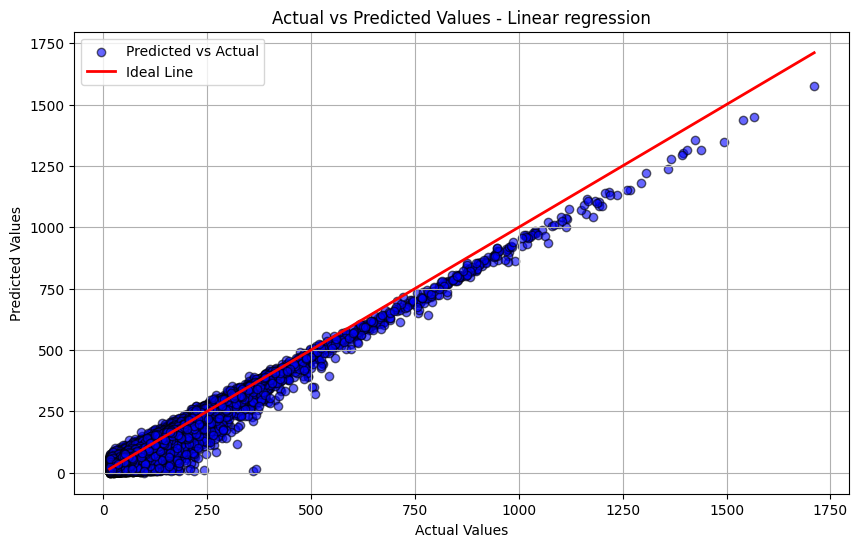

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Lirmodel_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear regression')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
print("starting")
etrmodel = ExtraTreesRegressor()
print("running")
etrmodel.fit(X_train, y_train)
print("Predicting")
etrpred = etrmodel.predict(X_test)
print("completed")

starting
running
Predicting
completed


In [30]:
etrmodel.score(X_test,y_test)

0.9458123416452295

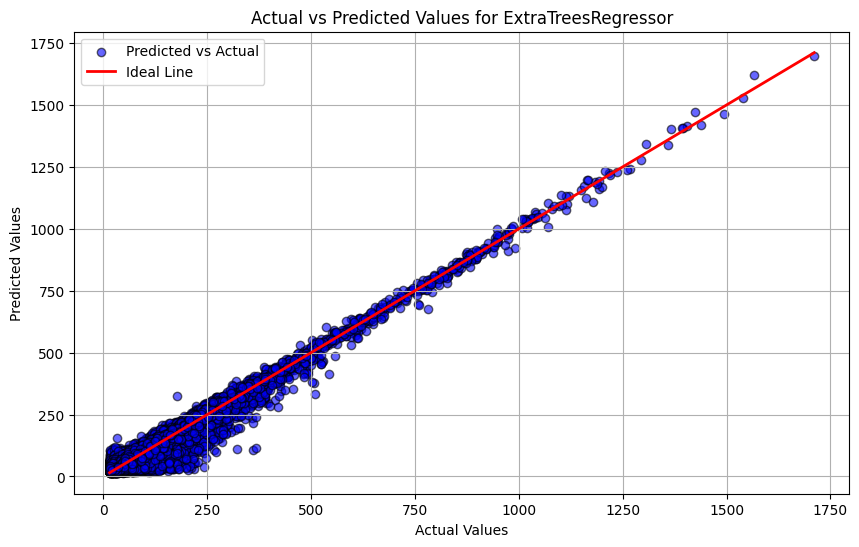

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, etrpred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for ExtraTreesRegressor')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
print("Starting with RandomForestRegressor")
rfr_model = RandomForestRegressor()  
print("Running RandomForestRegressor")
rfr_model.fit(X_train, y_train)
print("Predicting with RandomForestRegressor")
rfr_pred = rfr_model.predict(X_test)
print("Completed with RandomForestRegressor")

Starting with RandomForestRegressor
Running RandomForestRegressor
Predicting with RandomForestRegressor
Completed with RandomForestRegressor


In [33]:
rfr_model.score(X_test,y_test)

0.9465244040960963

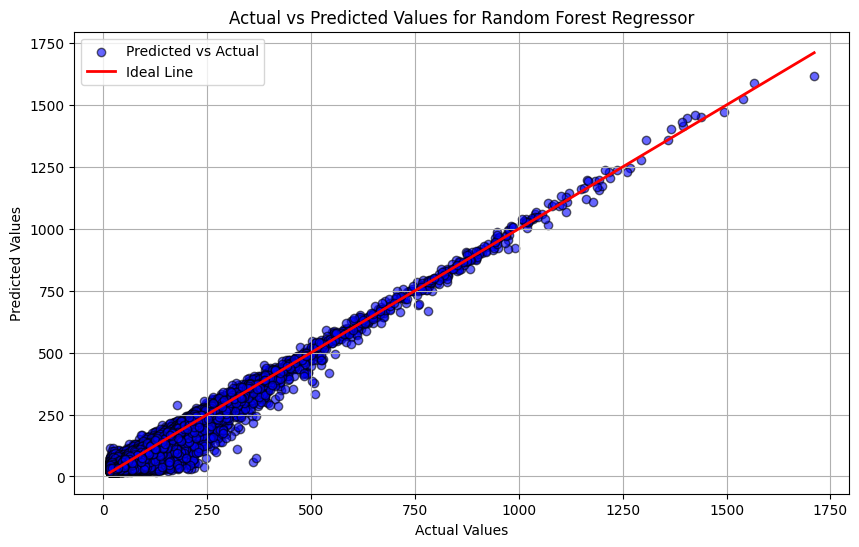

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
print("Starting with XGBoostRegressor")
xgb_model = xgb.XGBRegressor()  
print("Running XGBoostRegressor")
xgb_model.fit(X_train, y_train)  
print("Predicting with XGBoostRegressor")
xgb_pred = xgb_model.predict(X_test) 
print("Completed with XGBoostRegressor")

Starting with XGBoostRegressor
Running XGBoostRegressor
Predicting with XGBoostRegressor
Completed with XGBoostRegressor


In [36]:
xgb_model.score(X_test,y_test)

0.9110657600277737

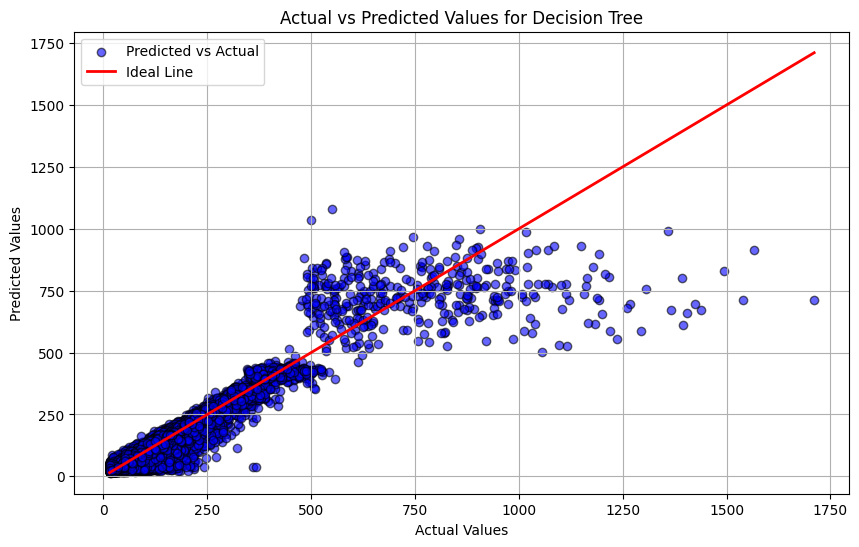

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred, color='blue', label='Predicted vs Actual', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()